In [1]:
import glob
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


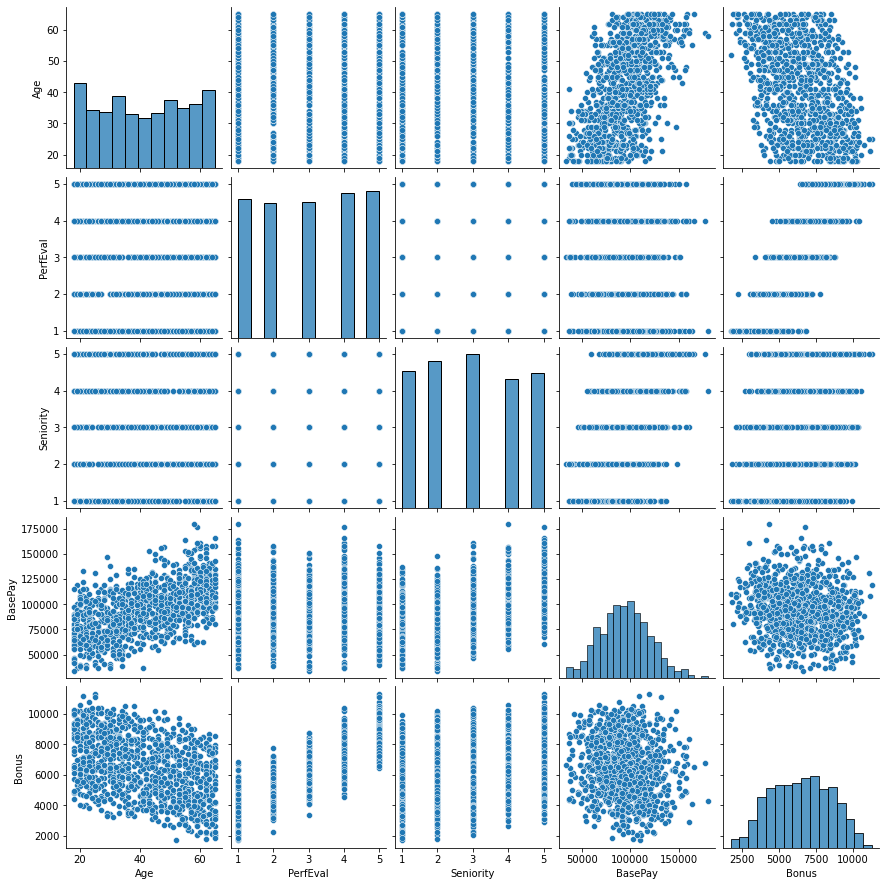

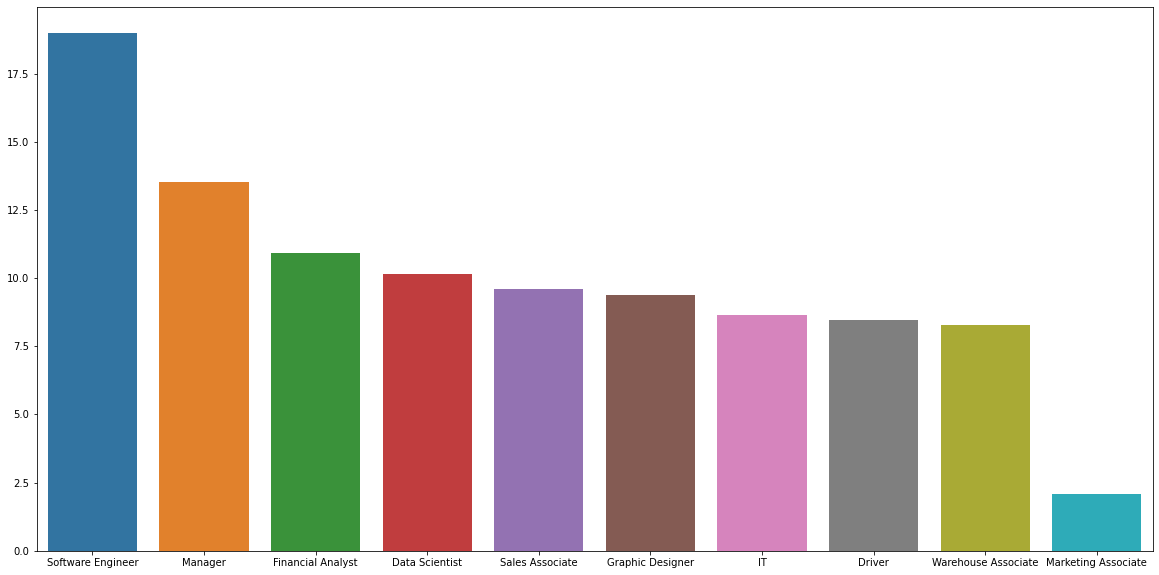

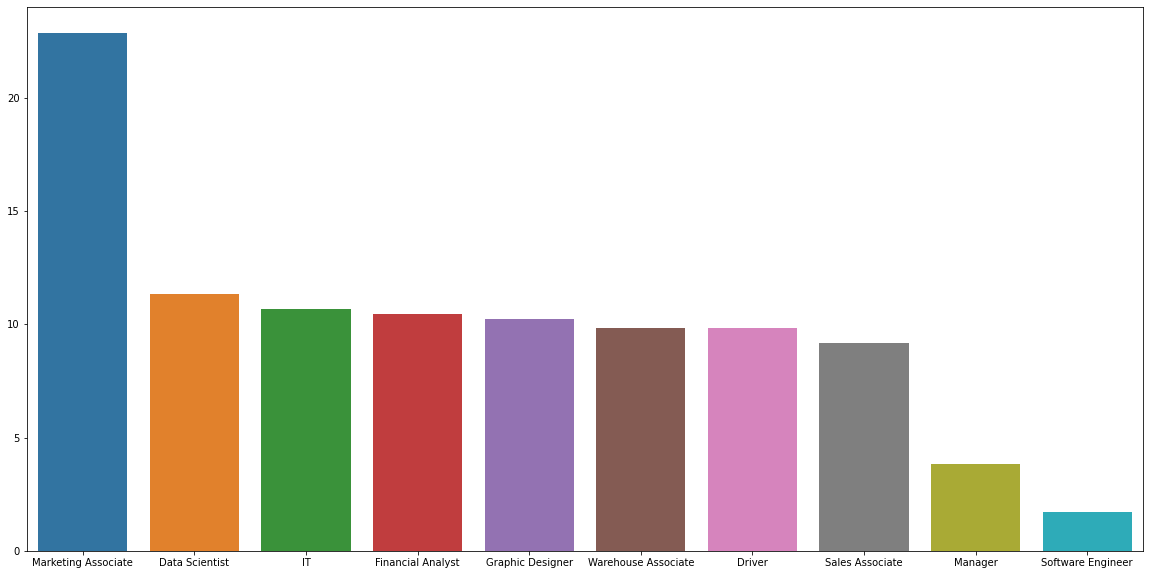

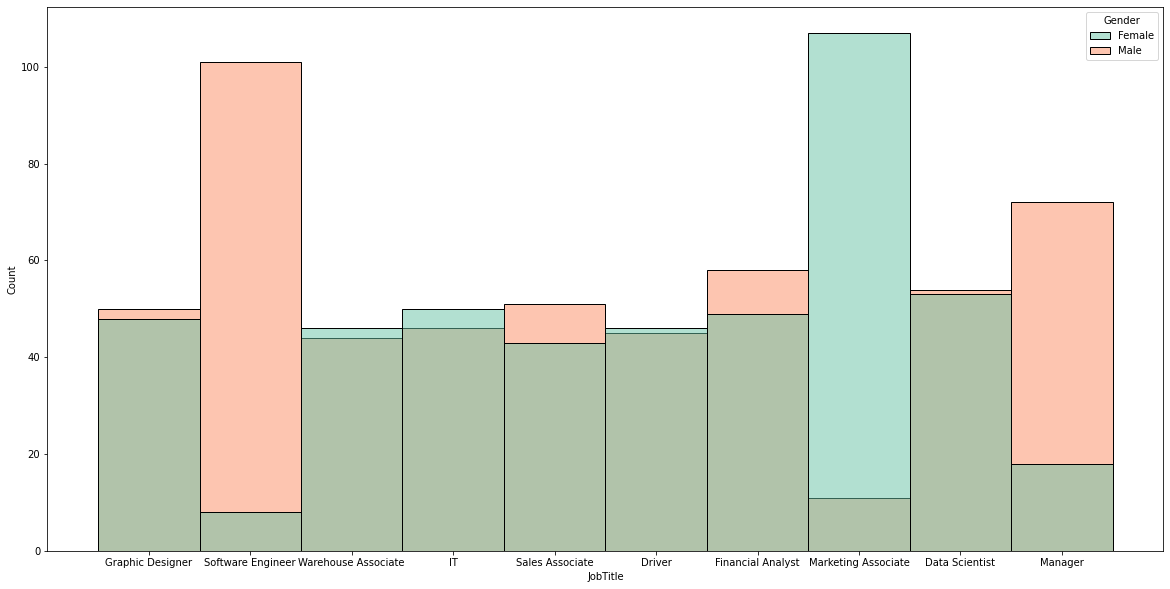

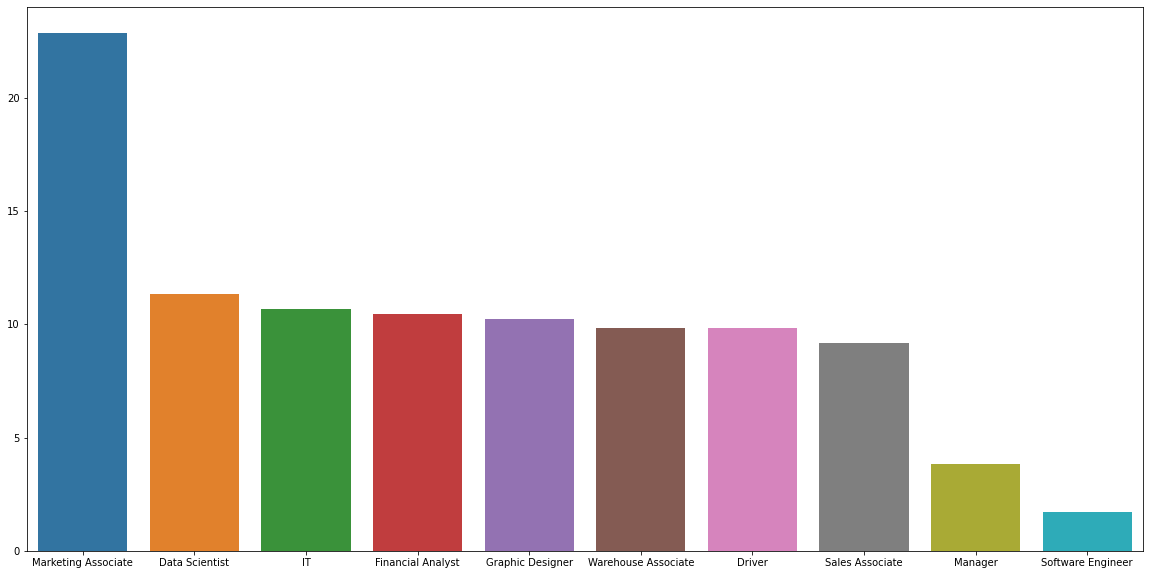

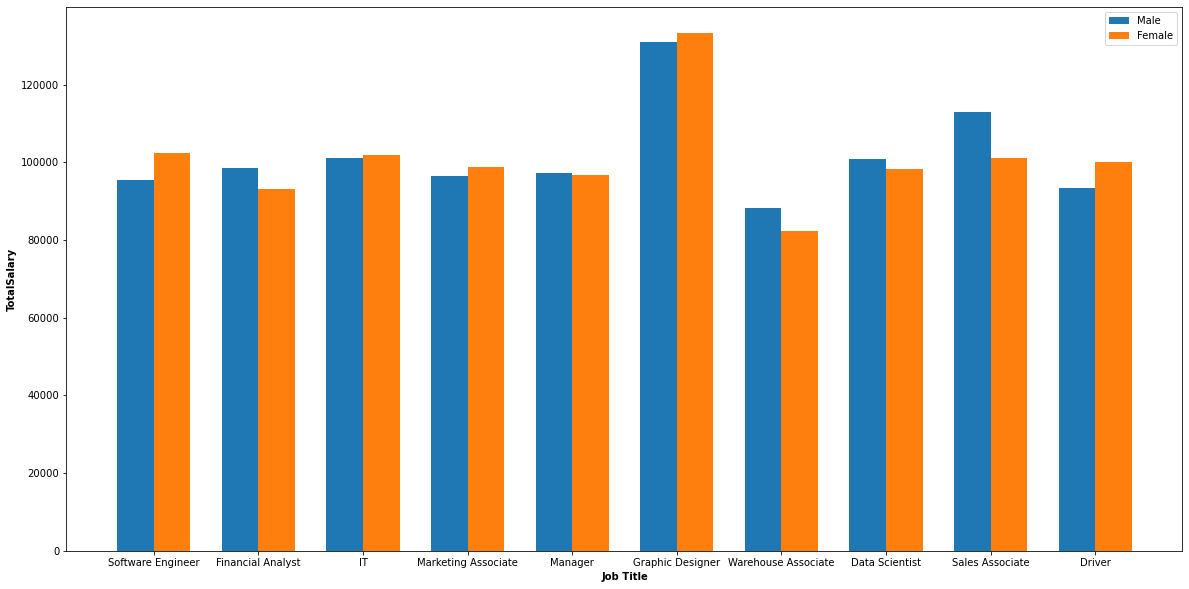

In [3]:
%run main.ipynb

In [4]:
from pca import pca

In [7]:
dataxstring = df.drop(columns = ["JobTitle", "Education", "Gender", "Dept"])

In [9]:
model = pca(normalize = True, n_components = None)
print("Fit transform results")
results = model.fit_transform(dataxstring)

Fit transform results
[pca] >n_components is set to 5
[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


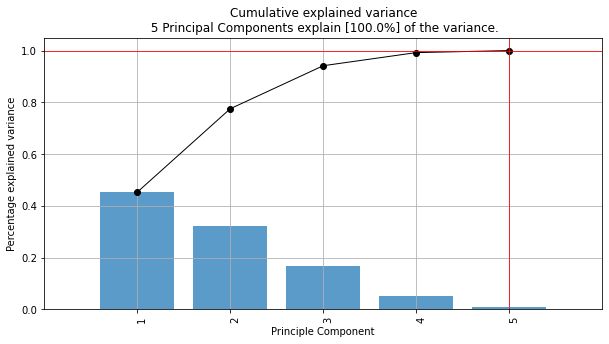

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 5 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [10]:
model.plot(figsize = (10,5))

In [11]:
results_df = pd.DataFrame(model.results["loadings"])
results_df

Age  PerfEval  Seniority   BasePay     Bonus  TotalSalary
PC1  0.415023 -0.123979   0.326622  0.584561 -0.185940     0.573949
PC2 -0.167904  0.616792   0.298893  0.123113  0.674747     0.177759
PC3  0.608299  0.447516  -0.654561  0.017356  0.023967     0.019391
PC4 -0.585660 -0.113936  -0.599020  0.371952  0.056027     0.379090
PC5 -0.294176  0.625255   0.129253  0.049820 -0.709428    -0.006346

In [12]:
model.results

{'loadings':           Age  PerfEval  Seniority   BasePay     Bonus  TotalSalary
 PC1  0.415023 -0.123979   0.326622  0.584561 -0.185940     0.573949
 PC2 -0.167904  0.616792   0.298893  0.123113  0.674747     0.177759
 PC3  0.608299  0.447516  -0.654561  0.017356  0.023967     0.019391
 PC4 -0.585660 -0.113936  -0.599020  0.371952  0.056027     0.379090
 PC5 -0.294176  0.625255   0.129253  0.049820 -0.709428    -0.006346,
 'PC':           PC1       PC2       PC3       PC4       PC5
 0   -3.713180  1.489280  0.045407 -0.182699 -0.065302
 1    0.028609  3.295118 -1.123752  0.424506 -0.157298
 2   -0.650865  2.027689 -1.573630 -0.037248  0.072364
 3   -0.184701  2.752848 -0.709863  0.841397  0.115069
 4   -0.113278  2.506768 -0.947040 -0.126545  0.365354
 ..        ...       ...       ...       ...       ...
 995 -0.952189 -3.014869  1.032469 -0.878832 -0.402901
 996  1.272187 -2.098570  0.463992  0.247358 -0.253638
 997  0.072041 -2.695467  0.515304  0.514623  0.109183
 998  0.744539 -2

In [13]:
model.results["topfeat"]

PC      feature   loading  type
0  PC1      BasePay  0.584561  best
1  PC2        Bonus  0.674747  best
2  PC3    Seniority -0.654561  best
3  PC4    Seniority -0.599020  best
4  PC5        Bonus -0.709428  best
5  PC3          Age  0.608299  weak
6  PC5     PerfEval  0.625255  weak
7  PC1  TotalSalary  0.573949  weak

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [seismic] can not create [992] unique colors! Available unique colors: [256].
[colourmap]> Warning: Colormap [seismic] can not create [992] unique colors! Available unique colors: [256].


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (45.2% expl.var)', ylabel='PC2 (32.2% expl.var)'>)

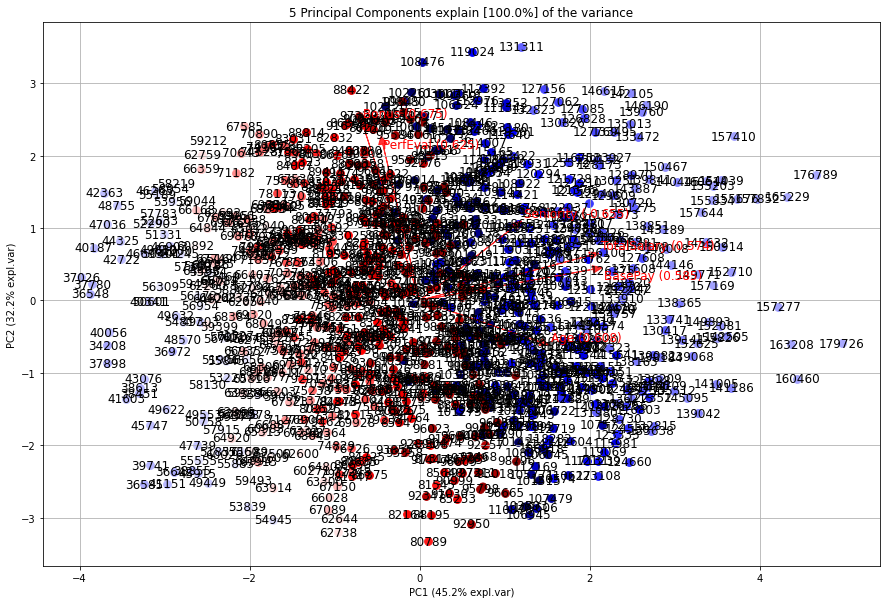

In [14]:
model.biplot(y=dataxstring['BasePay'].values, legend=False, cmap='seismic')

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [seismic] can not create [941] unique colors! Available unique colors: [256].
[colourmap]> Warning: Colormap [seismic] can not create [941] unique colors! Available unique colors: [256].


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (45.2% expl.var)', ylabel='PC2 (32.2% expl.var)'>)

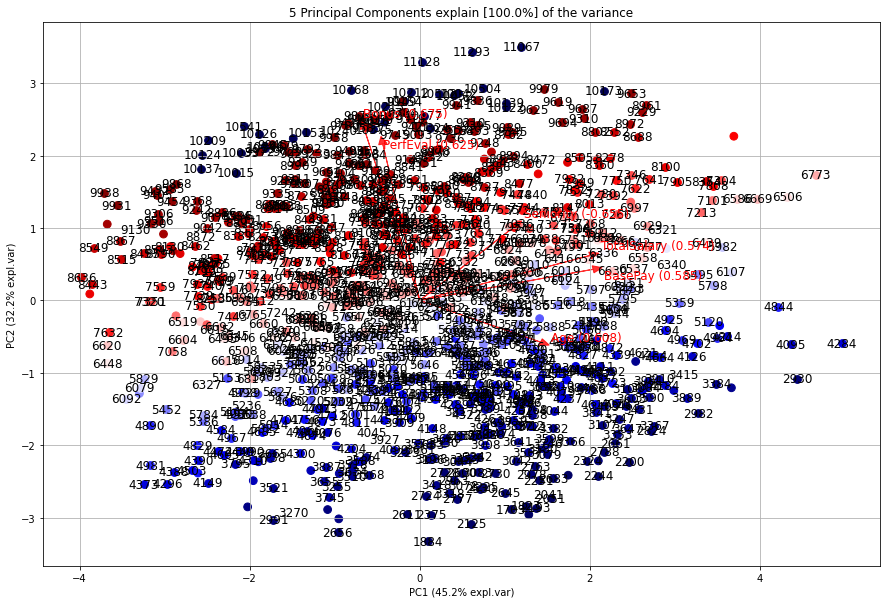

In [15]:
model.biplot(y=dataxstring['Bonus'].values, legend=False, cmap='seismic')

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (45.2% expl.var)', ylabel='PC2 (32.2% expl.var)'>)

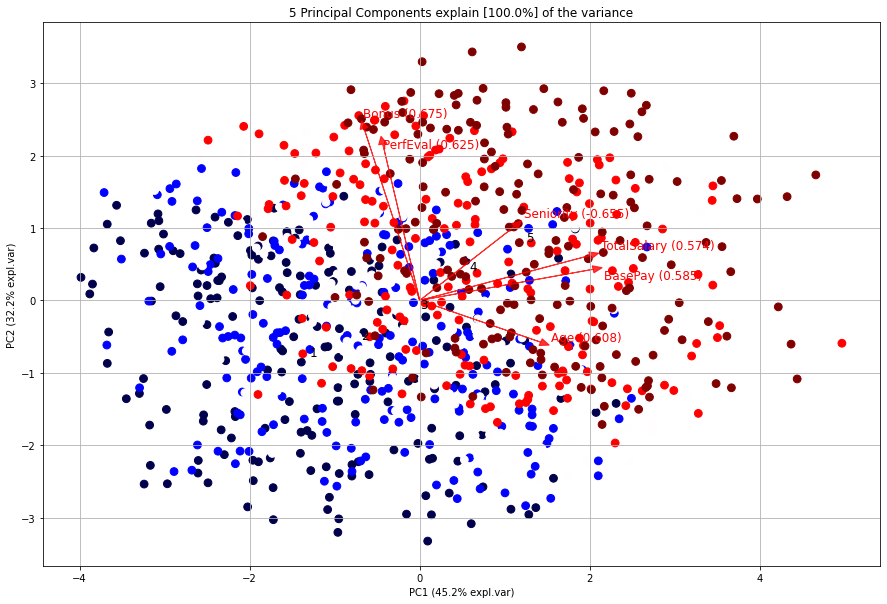

In [16]:
model.biplot(y=dataxstring['Seniority'].values, legend=False, cmap='seismic')

In [17]:
model = pca(normalize=True, detect_outliers=['ht2', 'spe'])
results = model.fit_transform(dataxstring)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [1000] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [1000] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.
Hotellings T2 results (y_proba: lower is better)
      y_proba     p_raw    y_score  y_bool  y_bool_spe  y_score_spe
0    0.916526  0.051113  15.441229   False       False     4.000708
1    0.916526  0.123241  12.682764   False       False     3.295242
2    0.916526  0.340821   9.017507   False       False     2.129589
3    0.916526  0.244883  10.295687   False       False     2.759037
4    0.916526  0.393321   8.422530   False       False     2.509326
..        ...       ...        ...     ...         ...          ...
995  0.916526  0.091899  13.631203   False       False     3.161660
996  0.916526  0.395187   8.402337   False       False     2

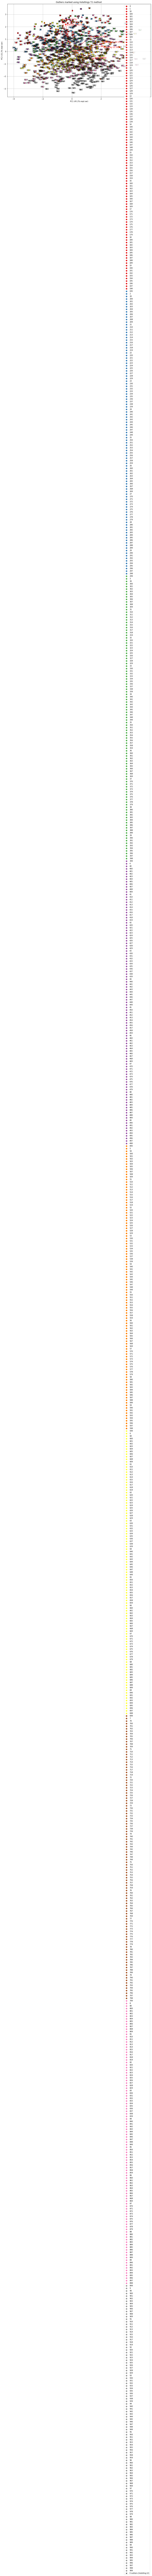

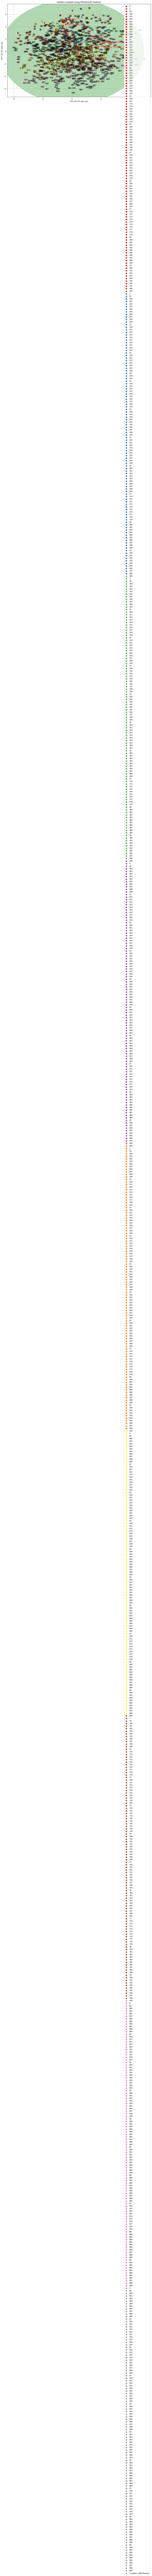

In [18]:
# Plot Hotellings T2
model.biplot(SPE=False, hotellingt2=True, title='Outliers marked using Hotellings T2 method.')
# Get the outliers using SPE/DmodX method.
dataxstring.loc[results['outliers']['y_bool'], :]
print("Hotellings T2 results (y_proba: lower is better)")
print(results['outliers'])

# Plot SPE/DmodX method
model.biplot(SPE=True, hotellingt2=False, title='Outliers marked using SPE/dmodX method.')
# Get the outliers using SPE/DmodX method
dataxstring.loc[results['outliers']['y_bool_spe'], :]
print("SPE/DmodX results (y_score_spe: higher is better)")
print(results['outliers'])